In [27]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the wine data file
wine_data = pd.read_csv('wine.data')

In [3]:
wine_data.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [4]:
# Drop their index column
wine_data = wine_data.drop('1', axis = 1)

In [5]:
# Change the columns to have meaningful names
wine_data.columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 
                'Nonflavanoid Phenols', 'Proanthocyanins','Color Intensity', 'Hue', 'OD280/OD315', 'Proline']

In [6]:
wine_data.head()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
wine_data.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
# Convert the data frame into a numpy matrix.
wine_data = wine_data.values

In [9]:
# Normalize all values. Subtract each value by the mean of its respective column and divide each by the standard deviation
normie_wine = (wine_data - wine_data.mean(axis=0)) / wine_data.std(axis=0)

In [10]:
# Build covariance matrix. Rowvar is False because rows represent entries while columns represent variables.
cov_mat = np.cov(normie_wine, rowvar = False)

In [11]:
# Find eigenvalues
eigs = np.linalg.eig(cov_mat)

In [12]:
# Numpy array of eigenvalues and eigenvectors
evals = eigs[0]
evecs = eigs[1]

In [13]:
# Transformed data. One dimension.
final_data = np.matmul(normie_wine, evals)

In [31]:
# Given a variance threshhold, find how many components we need to include to reach that threshhold
def var_prop(eigenvalues, threshhold):
    inc_val = []
    ex_val = []
    for index in range(0,len(eigenvalues)):
        inc_val.append(eigenvalues[index])
        ex_val = eigenvalues
        perc_var = sum(inc_val) / sum(ex_val)
        if (perc_var > threshhold):
            return [inc_val, perc_var]
    return inc_val
var_prop(evals, 0.85)

[[4.704377600172432,
  2.5155786475257256,
  1.4615873625971234,
  0.8666329761397835,
  0.9296966527894513,
  0.6485116223474763],
 0.8510403023192834]

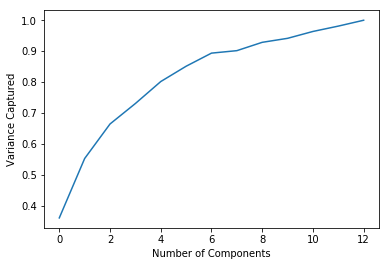

In [29]:
# Plot the variance for the number of components included.
def plot_eig(eigenvalues):
    inc_val = []
    ex_val = []
    x_plt = range(0,13)
    y_plt = []
    for index in range(0,len(eigenvalues)):
        inc_val.append(eigenvalues[index])
        ex_val = eigenvalues
        y_plt.append(sum(inc_val) / sum(ex_val))
    plt.plot(x_plt, y_plt,)
    plt.xlabel('Number of Components')
    plt.ylabel('Variance Captured')
    plt.show()
plot_eig(evals)